In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('salary_data_states_corrected.xlsx')

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#Recieve na reporting
ls = list(df.columns)
for x in ls:
  if sum(df[x].isna()) > 0:
    print(x)
    print(sum(df[x].isna()))
    print()

WORK_CITY
3

EDUCATION_LEVEL_REQUIRED
156185

COLLEGE_MAJOR_REQUIRED
156227

EXPERIENCE_REQUIRED_Y_N
156185

EXPERIENCE_REQUIRED_NUM_MONTHS
162313

COUNTRY_OF_CITIZENSHIP
156185

WORK_POSTAL_CODE
113604

FULL_TIME_POSITION_Y_N
11093

PREVAILING_WAGE_PER_YEAR
68



In [ ]:
df0 = df.copy()
sum(df0["WORK_CITY"].isna())

3

In [ ]:
df0.reset_index(drop=True, inplace=True)

In [ ]:
#Drop rows missing work city as we can not confirm a work-state without this information
df0.dropna(subset=["WORK_CITY"], inplace=True)
#sum(df0["WORK_CITY"].isna())
df0["WORK_CITY"]

0            BLOOMINGTON
1          SAN FRANCISCO
2            LOS ANGELES
3         HARLINGEN CISD
4               PORTLAND
               ...      
167273            SAIPAN
167274            SAIPAN
167275            SAIPAN
167276            SAIPAN
167277            SAIPAN
Name: WORK_CITY, Length: 167275, dtype: object

In [ ]:
df0["PREVAILING_WAGE_SUBMITTED_UNIT"].unique()

array(['year', 'month', 'bi-weekly', 'hour', 'week'], dtype=object)

In [ ]:
ls1 = df0["PAID_WAGE_SUBMITTED_UNIT"].unique()
ls1

array(['year', 'hour', 'month', 'week', 'bi-weekly'], dtype=object)

Options for viewing Salary types
1.) PREVAILING_WAGE_SUBMITTED
2.) PAID_WAGE_SUBMITTED

Enter a Salary View: 2

Options for viewing Salary time-periods
1) year
2) hour
3) month
4) week
5) bi-weekly

Enter a Time-period: 2

Descriptive Statistics
---------------------
MAX: $324.07
MIN: $8.77
AVG: $38.70
STDV: $24.70
Percentiles:
0.250     26.63500
0.500     32.00000
0.999    263.43535
Name: PAID_WAGE_SUBMITTED, dtype: float64


,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,PAID_WAGE_PER_YEAR
73,324.07,hour,303329.52
6727,300.00,hour,624000.00
6728,300.00,hour,624000.00
7815,288.46,hour,599996.80
14998,280.00,hour,582400.00
...,...,...,...
167054,9.25,hour,19240.00
167111,9.00,hour,18720.00
167121,8.88,hour,18470.40
167122,8.87,hour,18449.60


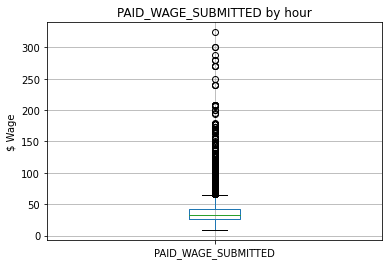

In [ ]:
#View outliers in Salary types
#Run this code again to validate after making modifications in codeblock below
import seaborn as sns 

df100 = df0.copy()
print("Options for viewing Salary types")
print("1.) PREVAILING_WAGE_SUBMITTED")
print("2.) PAID_WAGE_SUBMITTED")
print()
choice1 = int(input("Enter a Salary View: "))
if choice1 == 1:
  choice1= "PREVAILING_WAGE_SUBMITTED"
elif choice1 == 2:
  choice1 = "PAID_WAGE_SUBMITTED"

print()
print("Options for viewing Salary time-periods")
hold = 0
for t in ls1:
  hold+=1
  print(f'{hold}) {t}')


print()

choice2 = int(input("Enter a Time-period: "))
choice2 = ls1[choice2-1]

#Descriptive Statistics
df100 = df100[df100[f'{choice1}_UNIT']== choice2]
print()
print("Descriptive Statistics")
print('---------------------')
print(f'MAX: ${df100[choice1].max():,.2f}')
print(f'MIN: ${df100[choice1].min():,.2f}')
print(f'AVG: ${df100[choice1].mean():,.2f}')
print(f'STDV: ${df100[choice1].std():,.2f}')
print("Percentiles:")
print(df100[choice1].quantile(q=[0.25,0.5,0.999]))


choice3 = choice1[-11::-1]

df100 = df100[[choice1, f'{choice1}_UNIT', f'{choice3[-1::-1]}_PER_YEAR' ]].sort_values(by = [choice1], ascending=False)

#Time-series Boxplot
bplot = df100.boxplot(column = [choice1])
bplot.set_ylabel('$ Wage')
bplot.set_title(f'{choice1} by {choice2}')

df100

In [ ]:

#Label Prevailing + Paid Wage unit correctly based on a salary threshold to remove outliers/errors
mylst = ['PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED']
for x in mylst:
  index = -1
  for char in df0[f'{x}_UNIT']:
    index += 1
    if char != "year" and df0[x].iloc[index] > 30000:
      df0[f'{x}_UNIT'].iloc[index] = "year"
    elif char != "hour" and df0[x].iloc[index] < 300:
      df0[f'{x}_UNIT'].iloc[index] = "hour"
    else:
      index+=0
  

#Add values to the na values under Prevailing Wage per Year column through appropriate estimation
i = -1

for a in df0["PREVAILING_WAGE_PER_YEAR"]:
  i+=1
  if type(a) == float and pd.isna(a):
    if df0["PREVAILING_WAGE_SUBMITTED_UNIT"].iloc[i] == "year":
      df0["PREVAILING_WAGE_PER_YEAR"].iloc[i] = df0["PREVAILING_WAGE_SUBMITTED"].iloc[i]
    elif df0["PREVAILING_WAGE_SUBMITTED_UNIT"].iloc[i] == "month":
      df0["PREVAILING_WAGE_PER_YEAR"].iloc[i] = df0["PREVAILING_WAGE_SUBMITTED"].iloc[i] * 12
    elif df0["PREVAILING_WAGE_SUBMITTED_UNIT"].iloc[i] == "week":
      df0["PREVAILING_WAGE_PER_YEAR"].iloc[i] = df0["PREVAILING_WAGE_SUBMITTED"].iloc[i] * 52
    elif df0["PREVAILING_WAGE_SUBMITTED_UNIT"].iloc[i] == "bi-weekly":
      df0["PREVAILING_WAGE_PER_YEAR"].iloc[i] = df0["PREVAILING_WAGE_SUBMITTED"].iloc[i] * 21
    elif df0["PREVAILING_WAGE_SUBMITTED_UNIT"].iloc[i] == "hour":
      df0["PREVAILING_WAGE_PER_YEAR"].iloc[i] = df0["PREVAILING_WAGE_SUBMITTED"].iloc[i] * 2080

#Drop Outliers assessed in Yearly Prevailing/Paid Wage
#Filter out the remaining Outliers assessed in Yearly Prevailing/Paid Wage on basis of exceeding .999 Percentile
df0 = df0[df0["PREVAILING_WAGE_SUBMITTED"] < int(df0["PREVAILING_WAGE_SUBMITTED"][df0['PREVAILING_WAGE_SUBMITTED_UNIT'] == 'year'].quantile(q=[.999]))]
df0 = df0[df0["PAID_WAGE_SUBMITTED"] < int(df0["PAID_WAGE_SUBMITTED"][df0["PAID_WAGE_SUBMITTED_UNIT"] == 'year'].quantile(q=[.999]))]

#Filter wages (outliers) below federal min wage 
min_wage = 8.5
df0 = df0[df0["PAID_WAGE_SUBMITTED"] > min_wage] 
df0 = df0[df0["PREVAILING_WAGE_SUBMITTED"] > min_wage]


#Check na values dropped
sum(df0["PREVAILING_WAGE_PER_YEAR"].isna())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0

In [ ]:
#View Duplications/Erronous values in EMPLOYER_NAME column

unique_employers_df = pd.DataFrame()
unique_employers_df["Employers"] = df0["EMPLOYER_NAME"].unique()
unique_employers_df = unique_employers_df.sort_values("Employers")

mylst = []
for variable in unique_employers_df["Employers"]:
  mylst.append(variable)


display_list = []
loc = 1
for sixchar in mylst:
  loc+=1
  if loc < len(mylst)-1:
    if sixchar[0:6] in mylst[loc]:
      display_list.append(sixchar)
      display_list.append(mylst[loc])

display_df = pd.DataFrame()

display_df["Possible Errors"] = [r for r in display_list]
display_df

,Possible Errors
0,ABACUS BUSINESS SOLUTIONS INC
1,ABACUS TECHNICAL SERVICES LLC
2,ABACUS SERVICE CORPORATION
3,ABACUSS SOFTWARE TECHNOLOGIES
4,ABUNDANT LIFE ACADEMY
...,...
10425,ZODIAC SOLUTIONS INC [DUNS# 96-958-5384]
10426,ZODIAC SOLUTIONS INC
10427,ZODIAC SOUTIONS INC [DUNS# 96-958-5384]
10428,ZODIAC SOLUTIONS INC [DUNS# 96-958-5384]


In [ ]:
#df0['EMPLOYER_NAME'] = df0['EMPLOYER_NAME'].str.replace([",", ".", "INC", "INC."], "")
df0['EMPLOYER_NAME'] = df0['EMPLOYER_NAME'].str.replace(",", "")
df0['EMPLOYER_NAME'] = df0['EMPLOYER_NAME'].str.replace(".", "")
df0['EMPLOYER_NAME'] = df0['EMPLOYER_NAME'].str.replace("LIMITED", "LTD")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Cut Dataset into Data-related Jobs
data_df = df0[df0["JOB_TITLE"].str.contains("DATA")]
data_df.reset_index(drop=True, inplace=True)

#THINGS TO COMPLETE
#--------------------------------
#Question 1: 
#Do Diff Subgroups of jobs have a higher chance of case approval?
#Do specific companies offer a higher chance of case approval for these subgroups?
#-Correlation?


#Question 2:
#Length of time of case decision and job category?
#-Correlation?


#Question 3:
#Correlation Between visa type and case approval?
#-Common Visa types in different job categories?
#-Common Visa types in different States?


In [ ]:
#Cut Dataset into Data-related Jobs
data_df1 = data_df.copy()

#Group by job subtype and determine avg salary
data_df1 =data_df1.groupby("JOB_TITLE_SUBGROUP").agg({"PAID_WAGE_PER_YEAR": ["mean", "count"]}).round(2)

data_df1


PAID_WAGE_PER_YEAR      
                                    mean count
JOB_TITLE_SUBGROUP                            
business analyst                76209.89    53
data analyst                    69388.42  3719
data scientist                 107730.06  1180
management consultant           82973.68    22
software engineer              108217.95   292

In [ ]:
#Drop Assistant Professor from main Dataset
data_df.loc[data_df['JOB_TITLE_SUBGROUP']=='assistant professor']
data_df.drop(data_df.iloc[5060].name, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#I. Do specific sub-types of data-related jobs have higher or lower salaries than others?

data_df_sub1 = data_df.copy()
data_df_sub1 = data_df_sub1.groupby("JOB_TITLE_SUBGROUP").agg({"PAID_WAGE_PER_YEAR": "mean"}).round(2)
data_df_sub1.sort_values(by=["PAID_WAGE_PER_YEAR"], ascending=False, inplace=True)
data_df_sub1

# Software Engineer and Data Science positions superior in terms of salary

,PAID_WAGE_PER_YEAR
JOB_TITLE_SUBGROUP,
software engineer,108217.95
data scientist,107730.06
management consultant,82973.68
business analyst,76209.89
data analyst,69388.42


In [ ]:
# 1a) Which companies have the highest salaries for those sub-types?

#Group by data-related subgroup Jobs and Employers by Salary
data_df2 = data_df.copy()
data_df2 = data_df2.groupby(["JOB_TITLE_SUBGROUP", "EMPLOYER_NAME"]).agg({"PAID_WAGE_PER_YEAR": "mean"}).round(2)

data_df2 = data_df2.sort_values(["PAID_WAGE_PER_YEAR", "EMPLOYER_NAME"], ascending=False).groupby("JOB_TITLE_SUBGROUP").head(5)
data_df2.sort_values(by = ["JOB_TITLE_SUBGROUP", "PAID_WAGE_PER_YEAR"], ascending=False, inplace= True )
data_df2
 

PAID_WAGE_PER_YEAR
JOB_TITLE_SUBGROUP    EMPLOYER_NAME                                                  
software engineer     NETFLIX INC                                           188333.33
                      QUID INC                                              172500.00
                      BLUE KAI INC                                          165000.00
                      PANDORA MEDIA INC                                     162000.00
                      STITCH FIX INC                                        160000.00
management consultant INTEGRATED INFORMATICS (USA) INC                      145000.00
                      SLALOM LLC                                            104437.00
                      MASSACHUSETTS MUTUAL LIFE INSURANCE COMPANY           102000.00
                      PROFISEE GROUP INC                                     95000.00
                      SAGENCE INC                                            91000.00
data scientist        THE PNC FINANCIAL SERVICES GROUP INC                  205000.00
                      ADOBE SYSTEMS INCORPORATED                            181667.00
                      THE MATLEN SILVER GROUP INC                           176800.00
                      BED BATH AND BEYOND INC                               175000.00
                      GUAVUS INC                                            165000.00
data analyst          KNOWLEDGENT GROUP INC                                 185000.00
                      NETFLIX INC                                           177355.25
                      AVISO INC                                             165000.00
                      FIRST REPUBLIC BANK                                   160000.00
                      TELADOC INC                                           150000.00
business analyst      SLALOM LLC                                            131000.00
                      EBAY INC                                              128000.00
                      FACEBOOK INC                                          115000.00
                      BARCLAYS CAPITAL SERVICES INC                         111000.00
                      UBS SECURITIES LLC                                    105000.00

In [ ]:
# 1b) - Changes with location of the job?

#Location
data_df3 = data_df.copy()

data_df3 = data_df3.groupby(["JOB_TITLE_SUBGROUP", "WORK_STATE"]).agg({"PAID_WAGE_PER_YEAR": "mean"}).round(2)
data_df3 = data_df3.sort_values(["PAID_WAGE_PER_YEAR", "WORK_STATE"], ascending = False).groupby("JOB_TITLE_SUBGROUP").head(3)
data_df3.sort_values(by = "JOB_TITLE_SUBGROUP", ascending=False, inplace= True )
data_df3

PAID_WAGE_PER_YEAR
JOB_TITLE_SUBGROUP    WORK_STATE                       
software engineer     Oklahoma                125000.00
                      California              119719.55
                      New York                119703.89
management consultant Texas                   108500.00
                      Georgia                  99718.50
                      Massachusetts            98666.67
data scientist        California              117532.19
                      Washington              116191.51
                      Minnesota               111457.00
data analyst          Connecticut              81490.76
                      California               78839.66
                      New Hampshire            75943.25
business analyst      Connecticut             105000.00
                      Florida                  95000.00
                      California               94304.24

In [ ]:
# 1c) Quality of life

X


Enter State to Explore: Alabama
Would you like to explore another state (Y/N)y
Enter State to Explore: California
Would you like to explore another state (Y/N)y
Enter State to Explore: Washington
Would you like to explore another state (Y/N)n


,PAID_WAGE_PER_YEAR
WORK_STATE,
California,100566.15
Washington,97045.02
Alabama,69803.33


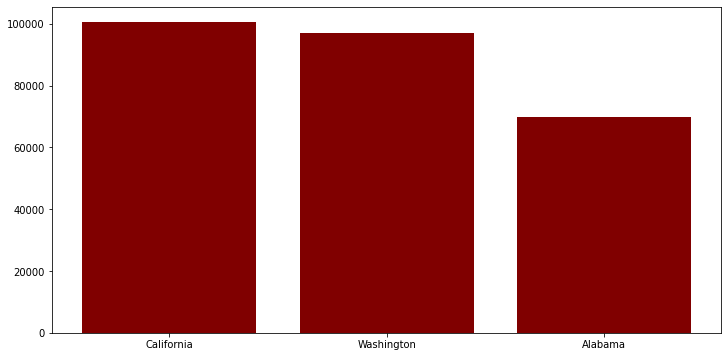

In [ ]:
#2a) What states (of those I am willing to move to) have the highest paying data-related salaries

data_df_states = data_df.copy()
data_df_states = data_df_states.groupby("WORK_STATE").agg({"PAID_WAGE_PER_YEAR": "mean"}).round(2)
data_df_states = data_df_states.sort_values(by = "PAID_WAGE_PER_YEAR", ascending = False)

lstt = []
add = "Y"

while add == "Y":
  selection = input("Enter State to Explore: ")
  lstt.append(selection)
  add = input("Would you like to explore another state (Y/N)").upper()

data_df_states = data_df_states.loc[lstt].sort_values(by = "PAID_WAGE_PER_YEAR", ascending = False)

plt.figure(figsize = (12, 6))
plt.bar(data_df_states.index, data_df_states['PAID_WAGE_PER_YEAR'], color = 'maroon')

data_df_states

In [ ]:
# - Differences between job sub-categories?
# - Which companies have the highest salaries for those sub-types?

data_df4 = data_df.copy()

stlst = []
choice = int(input("How many States would you like to explore? "))
if choice > 50 or choice <= 0 :
  print("Enter a value above 0 and under 50")
  choice = int(input("How many States would you like to explore? "))

for x in range(choice):
  st = input(f'Enter Name of State {x+1}: ').upper()
  if len(st) != 2:
    print("Please Enter state in abbreviated format e.g 'CA'")
    st = input(f'Enter Name of State {x+1}: ').upper()
  stlst.append(st)

data_df4.reset_index(inplace=True)


comp = input("Would you like to view companies in the state(s)? (Y/N)").upper()

i = -1
for x in data_df4['WORK_STATE_ABBREVIATION']:
  i+=1
  if x in stlst:
    i+=0
  else:
    data_df4.drop(index=i, inplace=True)

if comp == "Y":
  data_df4 = data_df4.groupby(["WORK_STATE", "JOB_TITLE_SUBGROUP", "EMPLOYER_NAME"]).agg({"PAID_WAGE_PER_YEAR": "mean"}).round(2)
  data_df4.sort_values(by=["WORK_STATE", "PAID_WAGE_PER_YEAR"], ascending=False, inplace=True)
else:
  data_df4 = data_df4.groupby(["WORK_STATE", "JOB_TITLE_SUBGROUP"]).agg({"PAID_WAGE_PER_YEAR": "mean"}).round(2)
  data_df4.sort_values(by=["WORK_STATE", "PAID_WAGE_PER_YEAR"], ascending=False, inplace=True)
  
data_df4



How many States would you like to explore? 2
Enter Name of State 1: OR
Enter Name of State 2: WI
Would you like to view companies in the state(s)? (Y/N)Y


PAID_WAGE_PER_YEAR
WORK_STATE JOB_TITLE_SUBGROUP EMPLOYER_NAME                                              
Wisconsin  data analyst       SYMPHONY CORPORATION                               90000.00
           data scientist     RENAISSANCE LEARNING INC                           90000.00
           data analyst       SENTRY INSURANCE                                   84593.50
                              MARSHALL & SWIFT/BOECKH LLC                        82934.00
           data scientist     METAMODELING ANALYTICS LLC                         80000.00
           data analyst       REVEREIT LLC                                       74880.00
                              JOHNSON CONTROLS INC                               68203.50
                              CSXPERTS LLC                                       65000.00
                              WITH LLC                                           65000.00
                              GLOBAL PHARMATEK LLC                               64000.00
                              GREEN PHARMATEK INC                                64000.00
                              WONDERBOX TECHNOLOGIES LLC                         63125.00
                              VEDICSOFT                                          62441.60
                              TT TECHNOLOGIES INC                                62000.00
                              GEORGE VENTURES LLC                                60500.00
                              DEAN HEALTH SYSTEMS INC                            60000.00
                              ETEAM SOLUTIONS INC                                60000.00
                              MICROINFO INC                                      60000.00
                              QUADRANT 4 SYSTEM CORPORATION                      60000.00
                              VASTIKA INC                                        60000.00
                              VESTICA HEALTHCARE LLC                             56500.00
                              ENTERFORCE INC                                     38000.00
Oregon     data scientist     NIKE INC                                          120000.00
                              ACT-ON SOFTWARE                                   110000.00
                              INTEL CORPORATION                                  99653.00
                              EXTERRO INC                                        94910.40
           software engineer  JLM PACIFIC EPOCH LLC                              80000.00
           data analyst       EPIQ CLASS ACTION & CLAIM SOLUTIONS INC            72800.00
                              YETI TECHNOLOGIES LLC DBA                          72800.00
                              ESCO CORPORATION                                   71999.72
                              VESTA CORPORATION                                  66500.00
                              IBM INDIA PRIVATE LTD                              64043.00
                              AMTEX SYSTEMS INC                                  60000.00
                              TEK ERP LLC                                        60000.00
                              SPLN INTERNATIONAL INC                             56222.40

In [ ]:
# III. How do offered salaries compare to the prevailing wage?
# - Are there job sub-categories that tend to get over-paid or under-paid?
mycopy = data_df.copy()
mycopy = mycopy[(mycopy["PAID_WAGE_SUBMITTED_UNIT"] != "bi-weekly")]
mycopy.reset_index(drop=True, inplace=True)

mycopy["Pay_Split_Under/Over"] = mycopy["PREVAILING_WAGE_SUBMITTED"] - mycopy["PAID_WAGE_SUBMITTED"]
mycopy["% Change"] = ((mycopy["PREVAILING_WAGE_SUBMITTED"] - mycopy["PAID_WAGE_SUBMITTED"])/mycopy["PREVAILING_WAGE_SUBMITTED"]).round(2)

index = 0

for x in mycopy["PREVAILING_WAGE_SUBMITTED_UNIT"]:
  if x == mycopy["PAID_WAGE_SUBMITTED_UNIT"].iloc[index]:
    index += 1
  else:
    mycopy.drop(index, inplace=True)
    index += 0

mycopy = mycopy[(mycopy["% Change"] >= -1)]

#Used for next questions
mycopy2 = mycopy.copy()

mycopy = mycopy.groupby(["JOB_TITLE_SUBGROUP","PAID_WAGE_SUBMITTED_UNIT"]).agg({"PREVAILING_WAGE_SUBMITTED":"mean", \
                                                                                "PAID_WAGE_SUBMITTED":"mean", "Pay_Split_Under/Over": "mean", \
                                                                                "% Change": "mean"}).round(2)
mycopy

PREVAILING_WAGE_SUBMITTED  \
JOB_TITLE_SUBGROUP    PAID_WAGE_SUBMITTED_UNIT                              
business analyst      hour                                          18.83   
                      year                                       69534.14   
data analyst          hour                                          30.41   
                      month                                       4329.00   
                      week                                        1071.00   
                      year                                       62422.24   
data scientist        hour                                          40.05   
                      year                                       91480.81   
management consultant year                                       70013.19   
software engineer     hour                                          43.84   
                      year                                       95698.17   

                                                PAID_WAGE_SUBMITTED  \
JOB_TITLE_SUBGROUP    PAID_WAGE_SUBMITTED_UNIT                        
business analyst      hour                                    21.00   
                      year                                 77485.57   
data analyst          hour                                    33.27   
                      month                                 4541.33   
                      week                                  1173.07   
                      year                                 69282.78   
data scientist        hour                                    49.66   
                      year                                107047.62   
management consultant year                                 80020.05   
software engineer     hour                                    50.97   
                      year                                107754.67   

                                                Pay_Split_Under/Over  % Change  
JOB_TITLE_SUBGROUP    PAID_WAGE_SUBMITTED_UNIT                                  
business analyst      hour                                     -2.17     -0.11  
                      year                                  -7951.44     -0.13  
data analyst          hour                                     -2.86     -0.10  
                      month                                  -212.32     -0.06  
                      week                                   -102.07     -0.09  
                      year                                  -6860.53     -0.12  
data scientist        hour                                     -9.61     -0.24  
                      year                                 -15566.81     -0.19  
management consultant year                                 -10006.86     -0.15  
software engineer     hour                                     -7.13     -0.15  
                      year                                 -12056.50     -0.13

In [ ]:
mycopy = data_df.copy()
mycopy = mycopy[(mycopy["PAID_WAGE_SUBMITTED_UNIT"] != "bi-weekly")]
mycopy.reset_index(drop=True, inplace=True)
index = 0
for x in mycopy["PREVAILING_WAGE_SUBMITTED_UNIT"]:
  if x == mycopy["PAID_WAGE_SUBMITTED_UNIT"].iloc[index]:
    index += 1
  else:
    mycopy.drop(index, inplace=True)
    index += 0
mycopy["Pay_Split_Under/Over"] = mycopy["PREVAILING_WAGE_SUBMITTED"] - mycopy["PAID_WAGE_SUBMITTED"]
mycopy["% Change"] = ((mycopy["PREVAILING_WAGE_SUBMITTED"] - mycopy["PAID_WAGE_SUBMITTED"])/mycopy["PREVAILING_WAGE_SUBMITTED"]).round(2)

#mycopy
#mycopy[(mycopy["% Change"] >= -1)]

In [ ]:
 #Are there companies that tend to over-pay or under-pay?
mycopy2 = mycopy2.groupby("EMPLOYER_NAME").agg({"% Change":"mean", "EMPLOYER_NAME": "count"}).round(2)
mycopy2 = mycopy2.sort_values(by = "% Change")
mycopy2 = mycopy2[(mycopy2["EMPLOYER_NAME"] >= 5)]
mycopy2.head(10)


,% Change,EMPLOYER_NAME
EMPLOYER_NAME,,
QUANTTUS INC,-0.87,3
CA INC,-0.79,3
KABBAGE INC,-0.73,4
THE ALLANT GROUP,-0.70,6
IMVU INC,-0.69,3
CSR INFOTECH INC,-0.62,3
NEW YORK LIFE INSURANCE COMPANY,-0.61,3
THE TRADE DESK INC,-0.52,4
WORLDQUANT LLC,-0.50,10
